# Baccarelli Lab AWS RONIN tutorial_3
This is the tutorial#3: 
- HPC demo for small GESTE 16S amplicon sequencing data

### by Yike Shen, 06/04/2021

Before start, make sure you have installed and launched following:

- Tutorial1: Created machine that meet your own need
- Tutorial1: launched RONIN Link terminal
- Tutorial2: Installed AWS CLI (RONIN and your local computer)
- Tutorial2: Transferred your working data to RONIN



#### Note ####
Two options for smaller sequecing jobs like this one
- Launch a larger master node, you can directly run your job in master node. (bash submit your job)(Do not close your terminal while it's running!
- Submit job in compute node using slurm job submission. (batch submit your job)

<br>
Attention: For slurm jobs, install conda in root drive, install all dependencies, package cluster, and launch a new cluster to submit jobs
<br>
I personally like to submit slurm jobs because your job will not be interrupted by things you do in command line. For slurm jobs, you must launch machine with autoscaling clusters.

In [ ]:
#1. Install anaconda
#Note: Always install the latest anaconda from: https://docs.conda.io/projects/conda/en/latest/user-guide/install/linux.html
##app drive (spack packages) can be called from both master node and compute node. (not suggested for conda)
#cd /apps

#Download
wget https://repo.anaconda.com/archive/Anaconda3-2020.11-Linux-x86_64.sh
#install
bash Anaconda3-2020.11-Linux-x86_64.sh


In [ ]:
#2. Install python pip
sudo apt install python-pip

In [ ]:
#3. Test example, microbiome 16S pipeline, Qiime2
#https://docs.qiime2.org/2020.6/install/native/
wget https://data.qiime2.org/distro/core/qiime2-2020.6-py36-linux-conda.yml
conda env create -n qiime2-2020.6 --file qiime2-2020.6-py36-linux-conda.yml
# OPTIONAL CLEANUP
rm qiime2-2020.6-py36-linux-conda.yml

In [ ]:
#4. Transfer data from AWS to RONIN
aws s3 sync s3://yikeshen/HPC_upgradetest/ /home/ubuntu/16Stest

In [ ]:
#5. you can now do your compute. For the script already written, submit slurm job
### Optional: Open gangalia to monitor your computation usage ###
#guide on submitting slurm jobs: https://www.aws-flux2020.org/03-npintro/02-runningslurm.html 
#example slurm batch job configuration:

#####Start with line below#######
#!/bin/bash
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=2
#SBATCH --job-name=qiime2

# Set the number of OpenMP threads
export OMP_NUM_THREADS=2

#Set working directory!
cd /shared/16Stest

#####Continue with your work in batch script
#Example please see folder 16S test.

######Slurm job submission example
#Now you are ready to submit your slurm jobs
sbatch qiime2-GESTE.batch
#The RONIN machine takes 15 minutes to start
#check your job queue
queue
#check your job
tail -20 slurm-4.out

###### bash submission example
bash qiime2-GESTE.batch
### Attention: Please do not close your terminal for bash computing! Otherwise your job will be terminatd.

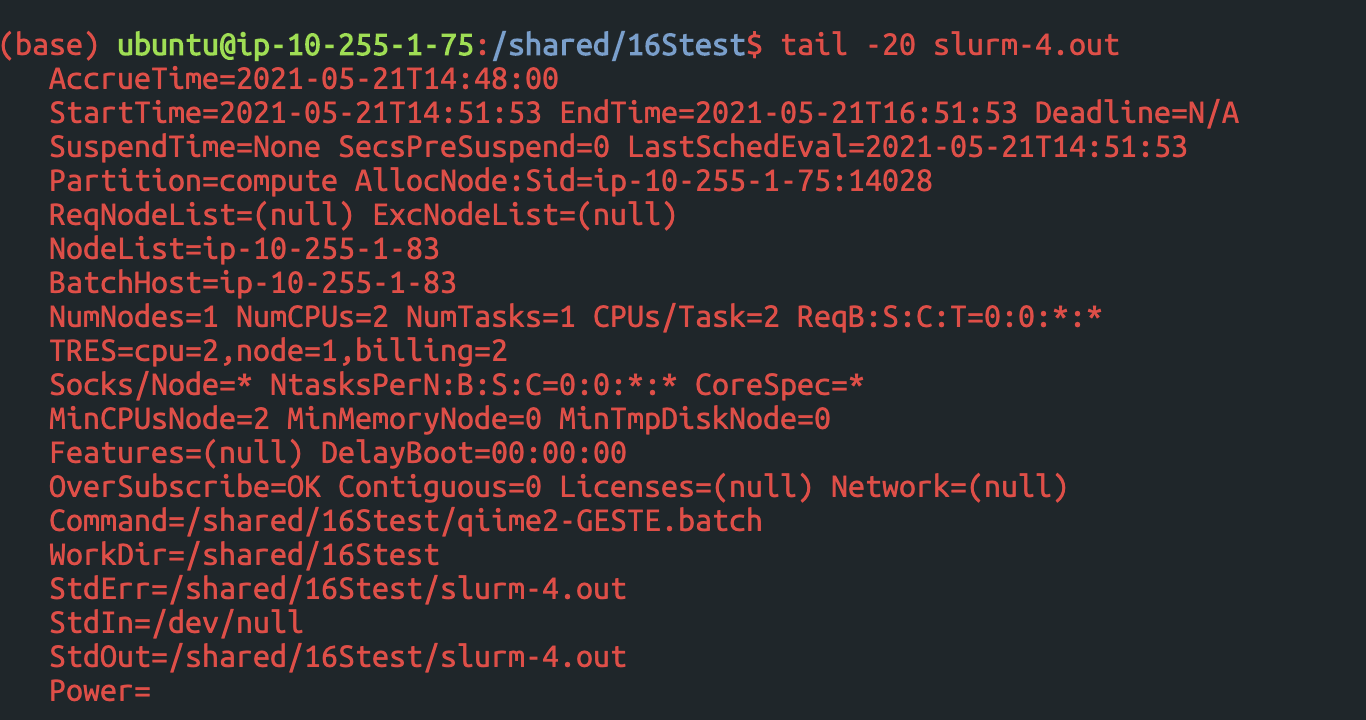